In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cnn_aug = pd.read_csv("augmentation-cnn.csv")
cnn_noaug = pd.read_csv("no-augmentation-cnn.csv")
cnn_subset_aug = pd.read_csv("cnn-subset-different-augmentations.csv")

f1_aug = cnn_aug["val_f1_macro"]
f1_noaug = cnn_noaug["val_f1_macro"]
f1_subset_aug = cnn_subset_aug["val_f1_macro"]

has_auroc = all(col in df.columns for col in ["val_auroc"] for df in [cnn_aug, cnn_noaug, cnn_subset_aug])
if has_auroc:
    auroc_aug = cnn_aug["val_auroc"]
    auroc_noaug = cnn_noaug["val_auroc"]
    auroc_subset_aug = cnn_subset_aug["val_auroc"]


In [ ]:
summary_data = {
    "Version": ["CNN (aug)", "CNN (no aug)", "CNN Subset (aug)"],
    "Mean F1 Macro": [f1_aug.mean(), f1_noaug.mean(), f1_subset_aug.mean()],
    "Std F1 Macro": [f1_aug.std(), f1_noaug.std(), f1_subset_aug.std()],
    "Runs": [len(f1_aug), len(f1_noaug), len(f1_subset_aug)]
}

if has_auroc:
    summary_data["Mean AUROC"] = [auroc_aug.mean(), auroc_noaug.mean(), auroc_subset_aug.mean()]
    summary_data["Std AUROC"] = [auroc_aug.std(), auroc_noaug.std(), auroc_subset_aug.std()]

summary_df = pd.DataFrame(summary_data)
display(summary_df)


,Version,Mean F1 Macro,Std F1 Macro,Runs,Mean AUROC,Std AUROC
0,CNN (aug),0.505163,0.043669,208,0.897874,0.015125
1,CNN (no aug),0.568662,0.011986,20,0.912024,0.005359
2,CNN Subset (aug),0.447002,0.025658,74,0.846842,0.017524


C:\Users\Ksawery\AppData\Local\Temp\ipykernel_16716\2939923114.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="Version", y="F1", width=0.5, palette="pastel", linewidth=1.5)


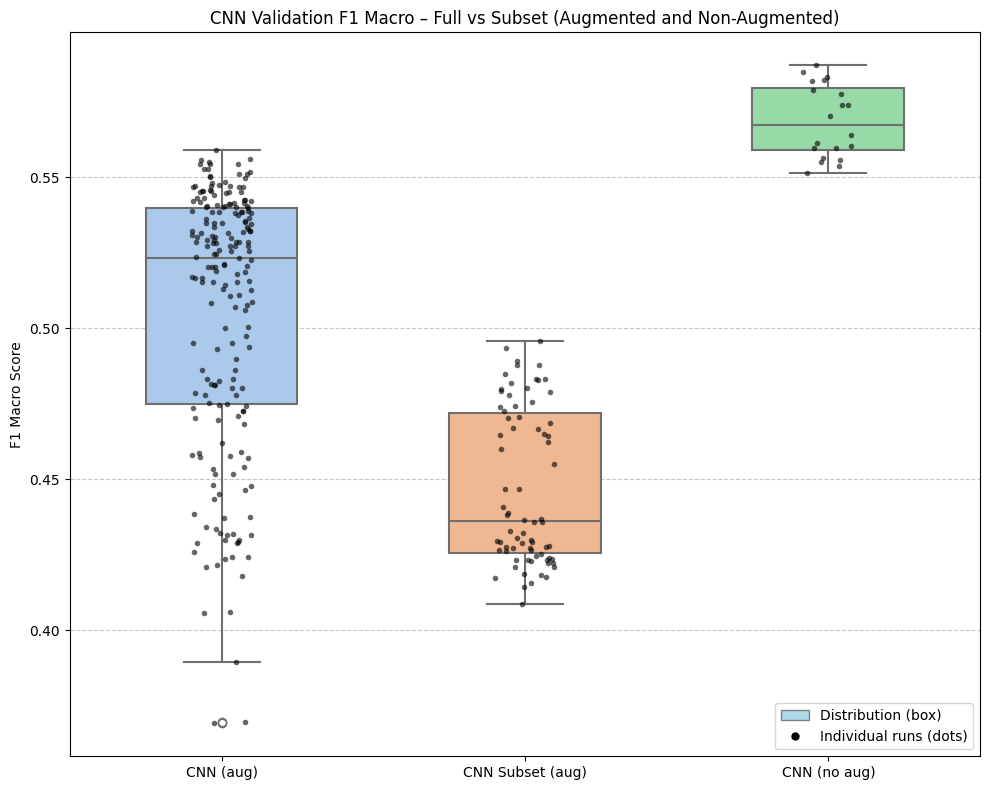

In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plot_df = pd.DataFrame({
    "F1": pd.concat([f1_aug, f1_subset_aug, f1_noaug], ignore_index=True),
    "Version": (
        ["CNN (aug)"] * len(f1_aug) +
        ["CNN Subset (aug)"] * len(f1_subset_aug) +
        ["CNN (no aug)"] * len(f1_noaug)
    )
})

plt.figure(figsize=(10, 8))
sns.boxplot(data=plot_df, x="Version", y="F1", width=0.5, palette="pastel", linewidth=1.5)
sns.stripplot(data=plot_df, x="Version", y="F1", marker='o', color='black', alpha=0.6, jitter=0.1, size=4)

legend_elements = [
    Patch(facecolor='lightblue', edgecolor='gray', label='Distribution (box)'),
    Line2D([0], [0], marker='o', color='black', label='Individual runs (dots)', markersize=5, linestyle='None')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.title("CNN Validation F1 Macro – Full vs Subset (Augmented and Non-Augmented)")
plt.ylabel("F1 Macro Score")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("cnn_aug_vs_subset_vs_noaug.png", dpi=300, bbox_inches="tight")
plt.show()


In [5]:
import os
import pandas as pd

file_map = {
    "CNN (aug)": "augmentation-cnn.csv",
    "CNN (no aug)": "no-augmentation-cnn.csv",
    "CNN Subset (aug)": "cnn-subset-different-augmentations.csv",
    "EfficientNet (aug)": "efficientnet-augment.csv",
    "EfficientNet (no aug)": "efficientnet-no-augment.csv",
    "Inception (aug)": "inception-augmentations.csv",
    "Inception (no aug)": "inception-no-augment.csv",
    "MobileNet (aug)": "mobilenet-augment.csv",
    "MobileNet (no aug)": "mobilenet-no-augment.csv",
    "ViT (aug)": "vit-augment.csv",
    "KAN Linear (aug)": "linear-kan-augment.csv",
    "KAN Linear (no aug)": "linear-kan-no-augment.csv"
}

summary_rows = []

for model_name, filename in file_map.items():
    if not os.path.exists(filename):
        continue
    df = pd.read_csv(filename)
    if "val_f1_macro" not in df.columns:
        continue

    f1_vals = df["val_f1_macro"]

    # If it's a CNN variant, keep all runs
    if "CNN" in model_name:
        mean_f1 = round(f1_vals.mean(), 3)
        runs = len(f1_vals)
    else:
        mean_f1 = round(f1_vals.max(), 3)  # Take the single best run
        runs = 1

    summary_rows.append({
        "Model": model_name,
        "Mean F1 Macro": mean_f1,
        "Runs": runs
    })

summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(by="Mean F1 Macro", ascending=False)
display(summary_df)

summary_df.to_csv("all_models_f1_summary_best_single.csv", index=False)


,Model,Mean F1 Macro,Runs
6,Inception (no aug),0.831,1
5,Inception (aug),0.822,1
4,EfficientNet (no aug),0.725,1
8,MobileNet (no aug),0.671,1
7,MobileNet (aug),0.630,1
10,KAN Linear (aug),0.569,1
11,KAN Linear (no aug),0.569,1
1,CNN (no aug),0.569,20
3,EfficientNet (aug),0.531,1
0,CNN (aug),0.505,208


C:\Users\Ksawery\AppData\Local\Temp\ipykernel_2052\140388680.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x="Model", y="F1", width=0.5, palette="pastel", linewidth=1.5)


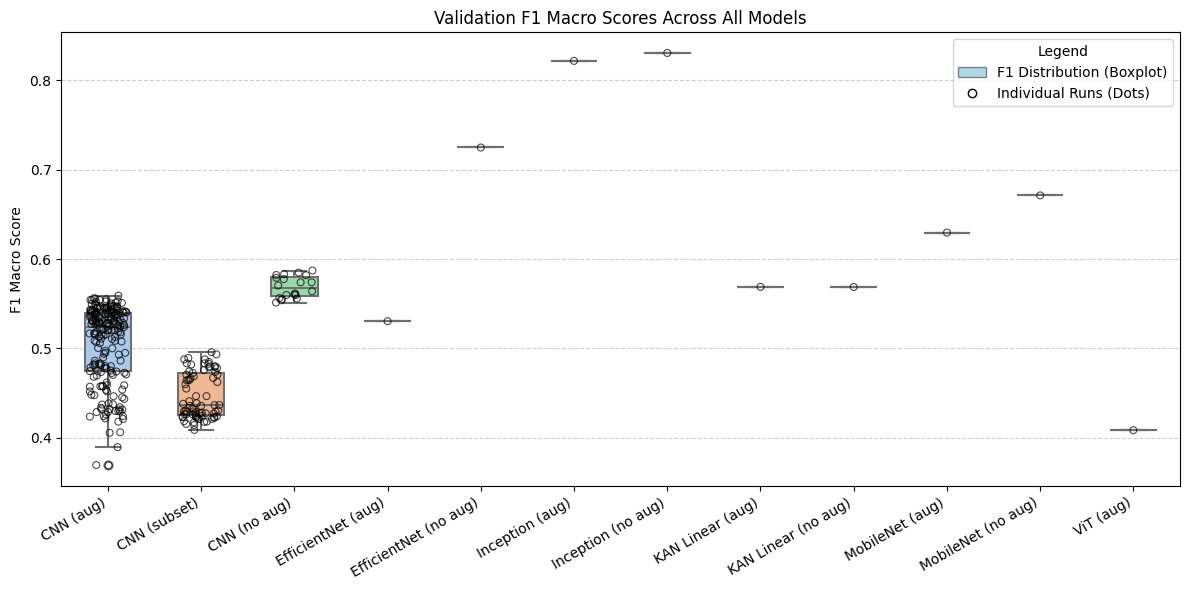

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os

file_map = {
    "CNN (aug)": "augmentation-cnn.csv",
    "CNN (subset)": "cnn-subset-different-augmentations.csv",
    "CNN (no aug)": "no-augmentation-cnn.csv",
    "EfficientNet (aug)": "efficientnet-augment.csv",
    "EfficientNet (no aug)": "efficientnet-no-augment.csv",
    "Inception (aug)": "inception-augmentations.csv",
    "Inception (no aug)": "inception-no-augment.csv",
    "MobileNet (aug)": "mobilenet-augment.csv",
    "MobileNet (no aug)": "mobilenet-no-augment.csv",
    "ViT (aug)": "vit-augment.csv",
    "KAN Linear (aug)": "linear-kan-augment.csv",
    "KAN Linear (no aug)": "linear-kan-no-augment.csv"
}

plot_rows = []

for model_name, file_path in file_map.items():
    if not os.path.exists(file_path):
        continue
    df = pd.read_csv(file_path)
    if "val_f1_macro" not in df.columns:
        continue
    
    if "CNN" in model_name:
        for val in df["val_f1_macro"]:
            plot_rows.append({"Model": model_name, "F1": val})
    else:
        best_val = df["val_f1_macro"].max()
        plot_rows.append({"Model": model_name, "F1": best_val})

plot_df = pd.DataFrame(plot_rows)

model_order = ["CNN (aug)", "CNN (subset)", "CNN (no aug)"] + \
              sorted(set(plot_df["Model"]) - {"CNN (aug)", "CNN (subset)", "CNN (no aug)"})
plot_df["Model"] = pd.Categorical(plot_df["Model"], categories=model_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_df, x="Model", y="F1", width=0.5, palette="pastel", linewidth=1.5)
sns.stripplot(
    data=plot_df, x="Model", y="F1",
    marker='o', edgecolor='black', facecolors='none',
    jitter=0.2, size=5, linewidth=0.8, alpha=0.7
)

plt.xticks(rotation=30, ha="right")
plt.title("Validation F1 Macro Scores Across All Models")
plt.ylabel("F1 Macro Score")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.6)

legend_elements = [
    Patch(facecolor='lightblue', edgecolor='gray', label='F1 Distribution (Boxplot)'),
    Line2D([0], [0], marker='o', color='black', label='Individual Runs (Dots)',
           markerfacecolor='none', markersize=6, linestyle='None')
]
plt.legend(handles=legend_elements, title="Legend", loc='upper right')

plt.tight_layout()
plt.savefig("f1_comparison_all_models.png", dpi=300, bbox_inches="tight")
plt.show()
